# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [61]:
student_number = "99100036"
full_name = "Hooman Zolfaghari"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [63]:
#TODO
data = pd.read_csv("nutrition.csv")
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [64]:
#TODO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [65]:
#TODO
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.set_index('ID')
numeric_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

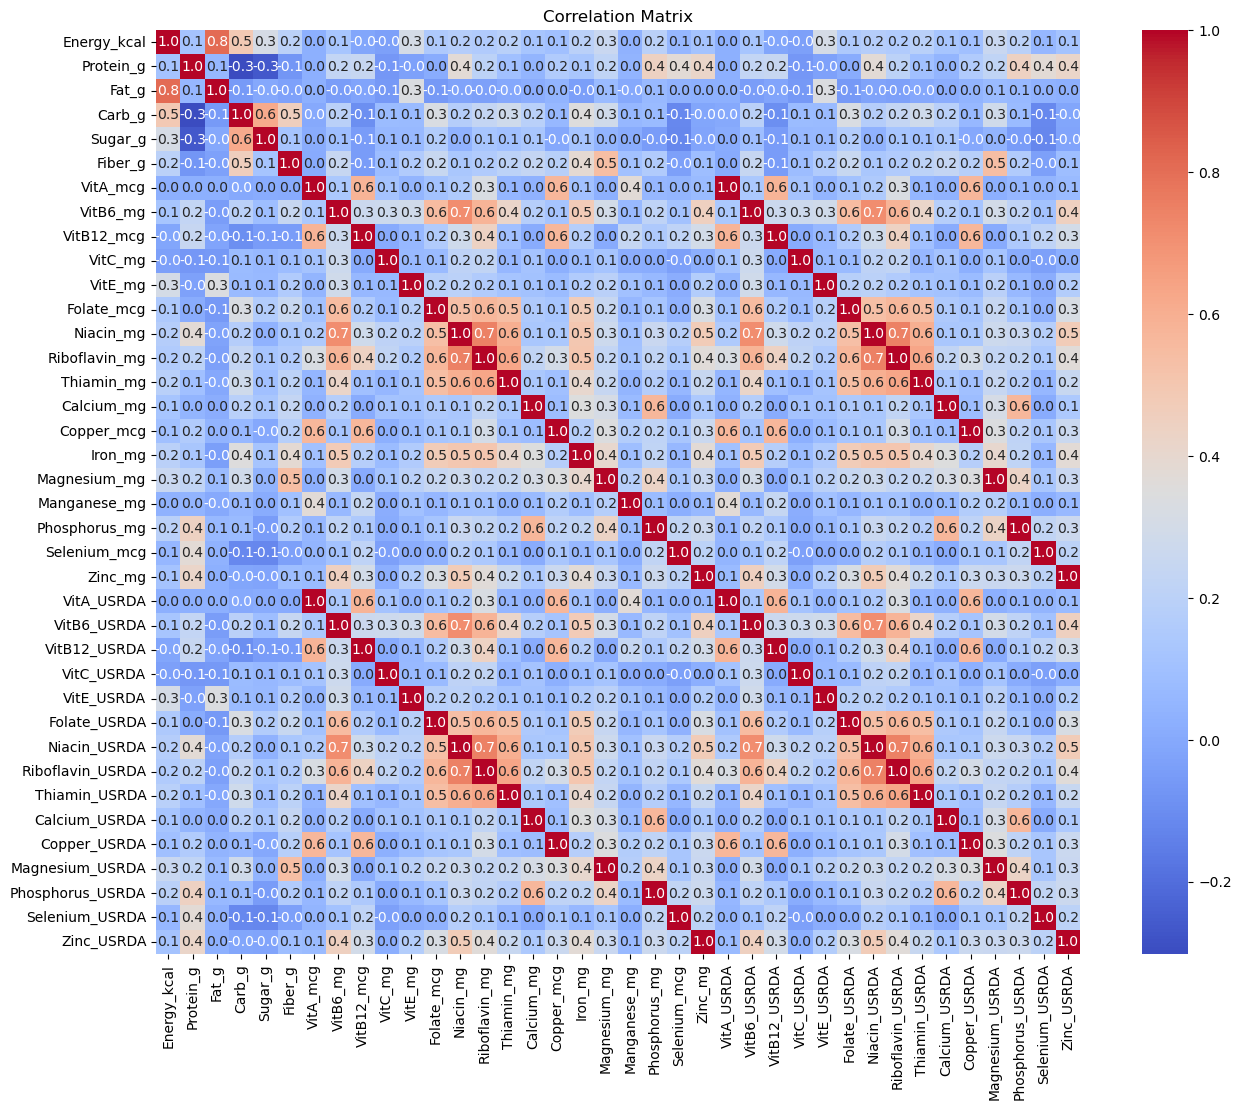

In [66]:
#TODO
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

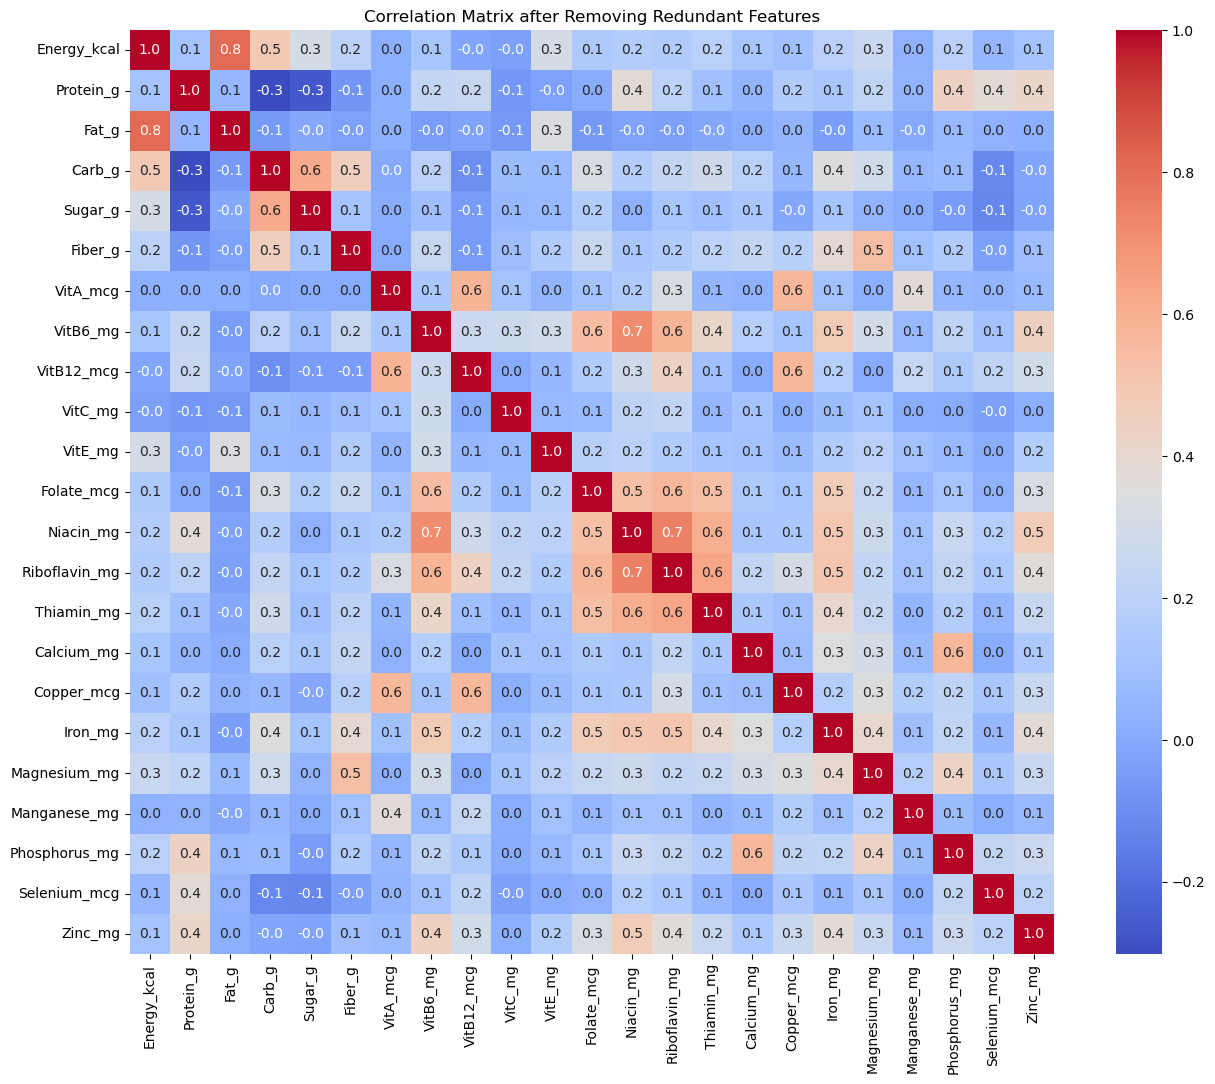

In [67]:
#TODO


redundant_features = set()
#Getting diagonal and lower triangular pairs of correlation matrix
cols = numeric_data.columns
for i in range(0, numeric_data.shape[1]):
    for j in range(0,i+1):
        redundant_features.add((cols[i], cols[j]))

threshold=0.9

au_corr = numeric_data.corr().abs().unstack()
au_corr = au_corr.drop(labels=redundant_features).sort_values(ascending=False)
redundant_features = au_corr[au_corr > threshold]

features_to_remove = set([item[1] for item in redundant_features.index])
numeric_data = numeric_data.drop(columns=features_to_remove)

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix after Removing Redundant Features')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

In [68]:
numeric_data.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

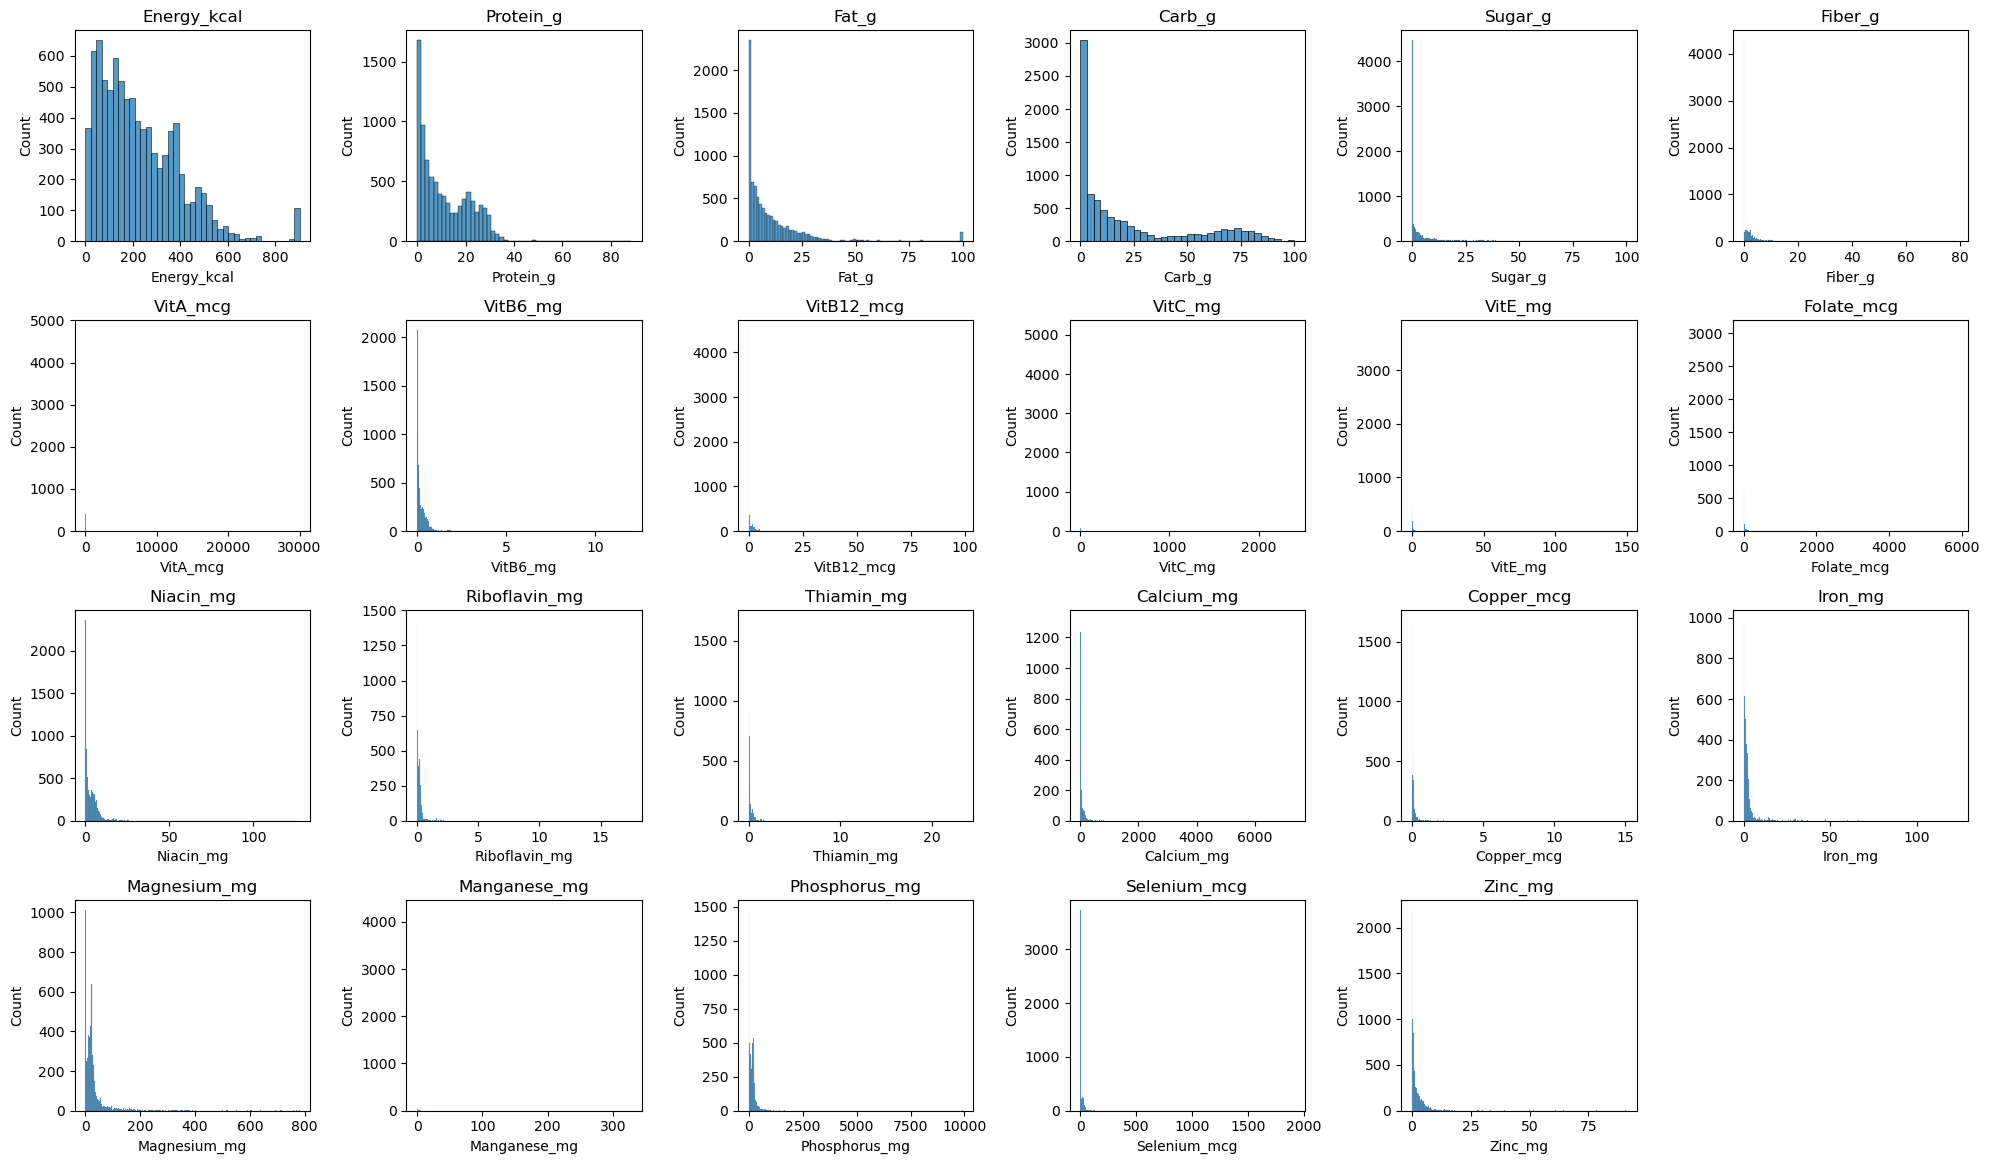

In [69]:
#TODO
numeric_features = numeric_data.columns
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features):
    plt.subplot(7, 6, i + 1)
    sns.histplot(numeric_data[feature], kde=False)
    plt.title(feature)
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [70]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = numeric_data
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


In [71]:
numeric_data = df_boxcoxed

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

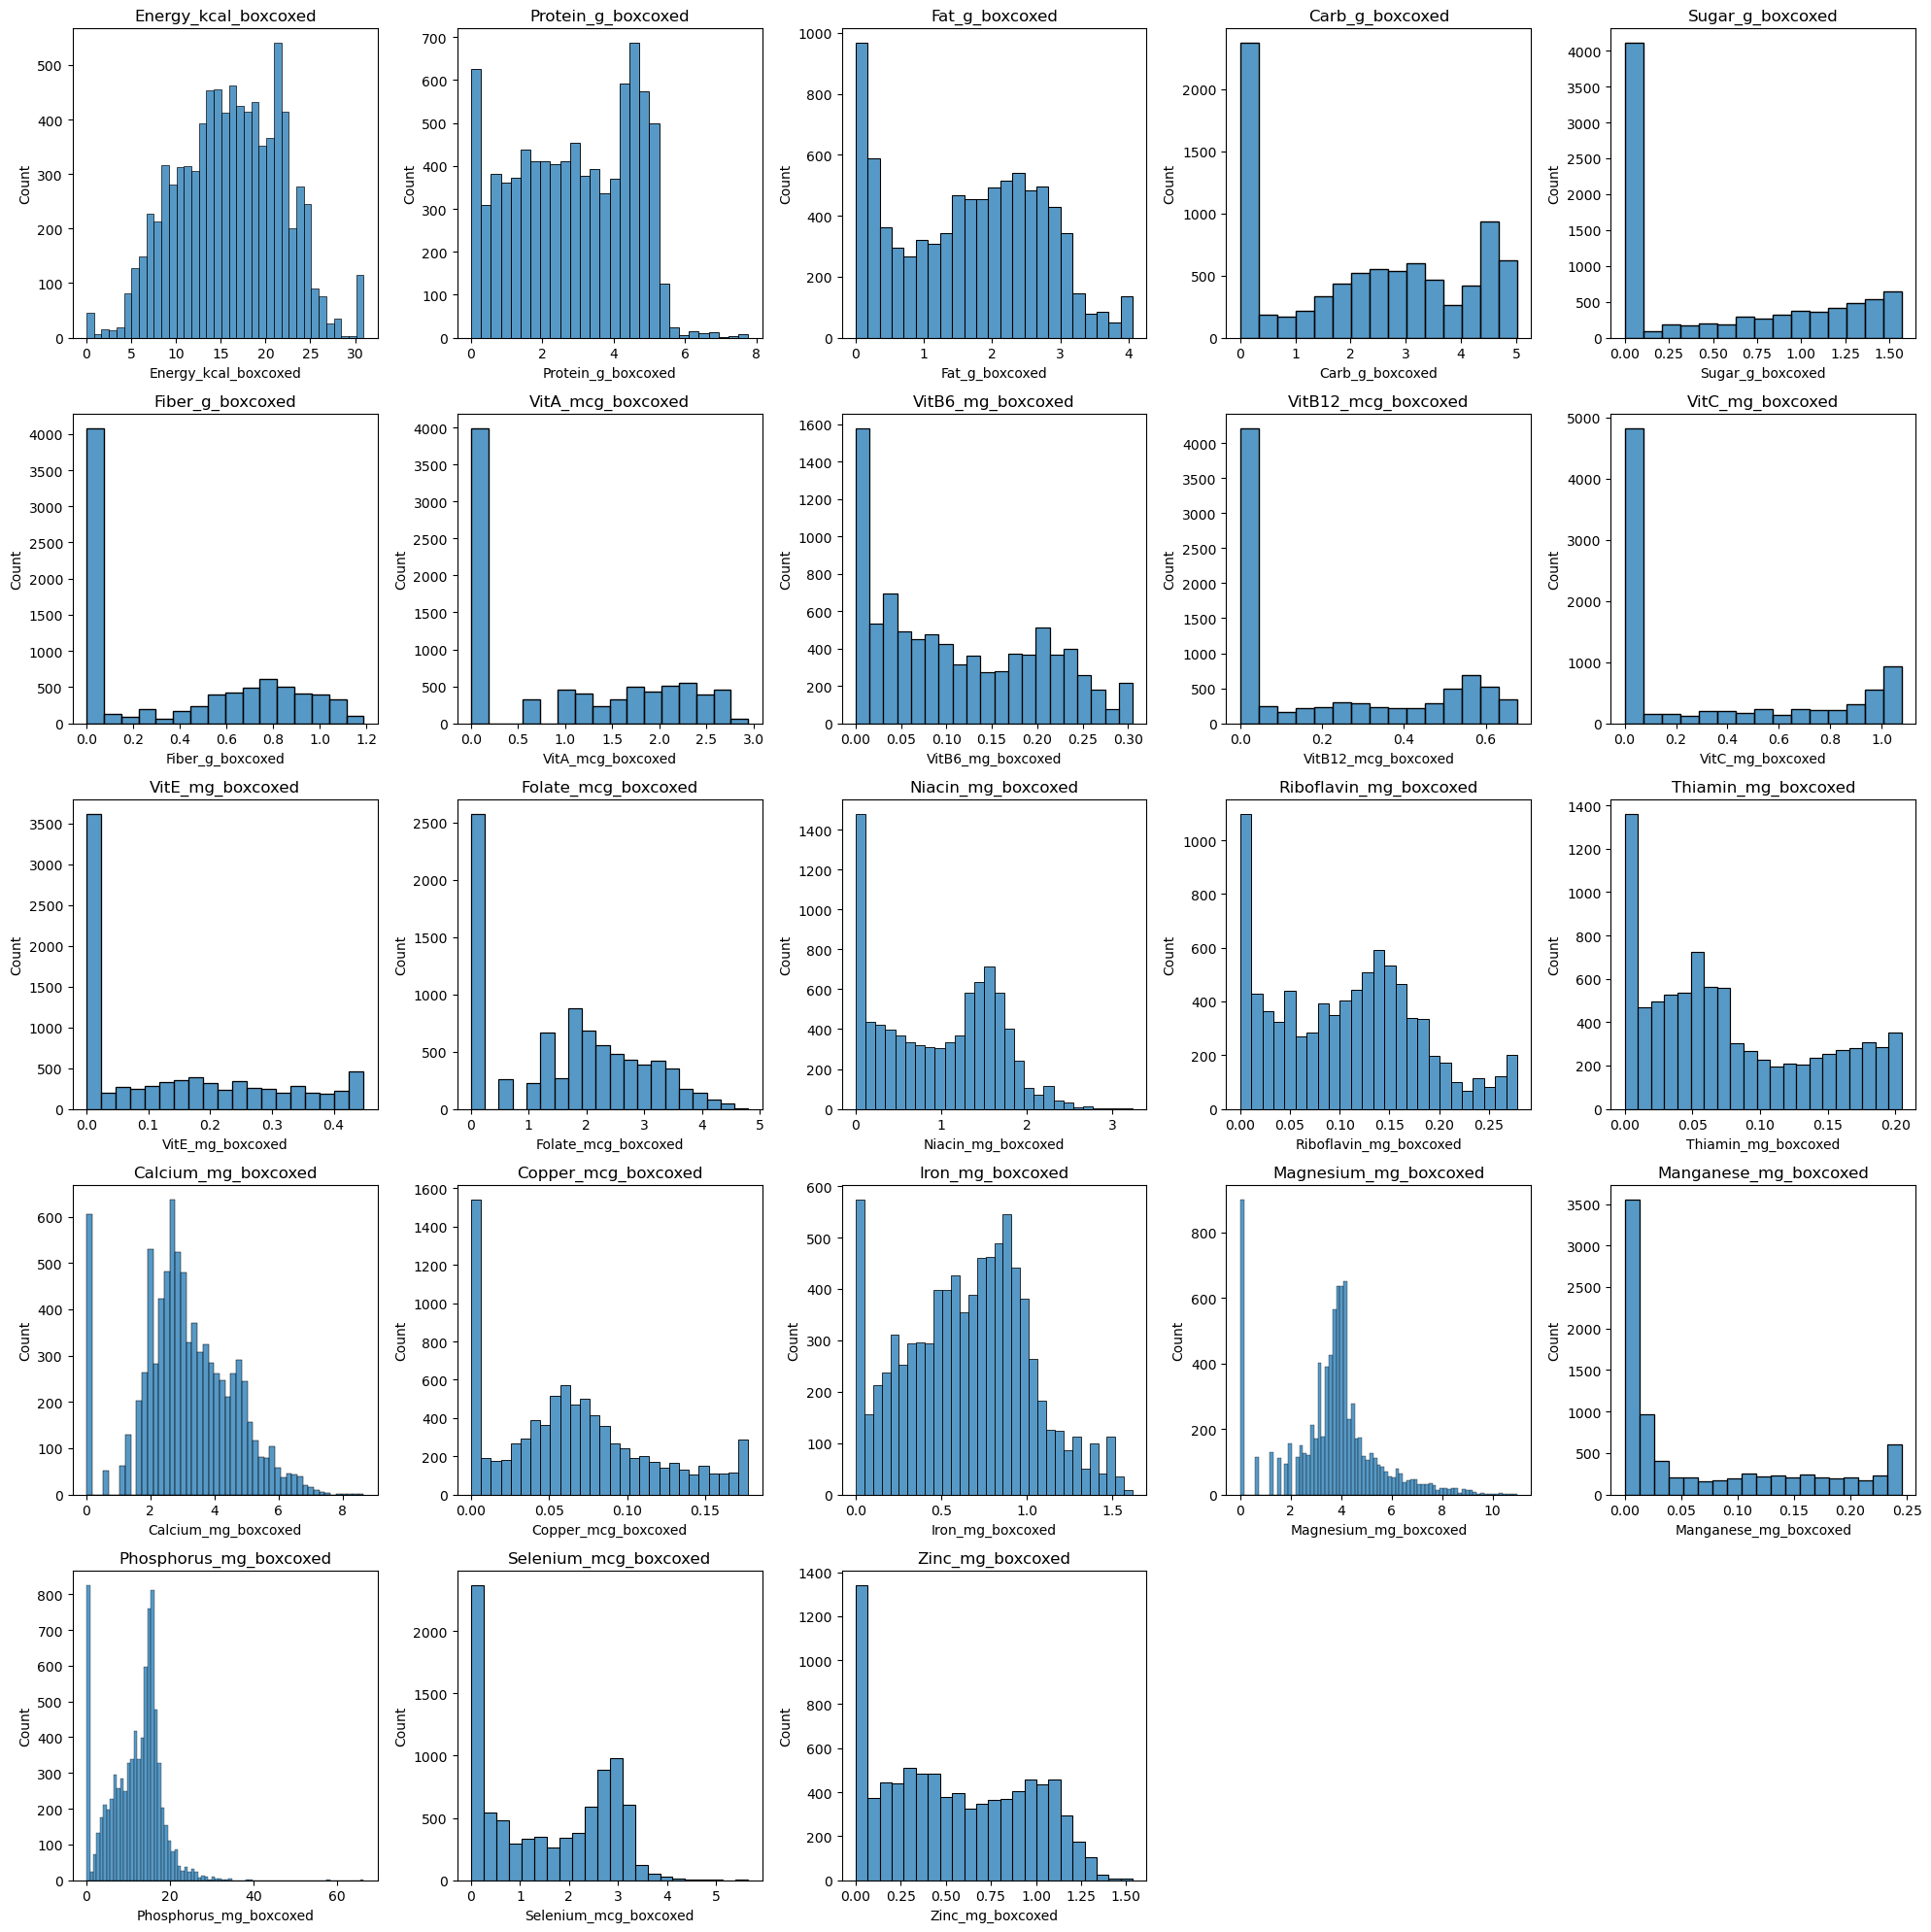

In [72]:
#TODO

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_data.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(numeric_data[feature], kde=False)
    plt.title(feature)
plt.tight_layout()
plt.show()



Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [73]:
#TODO

scaler = StandardScaler()

numeric_data_scaled = scaler.fit_transform(numeric_data)

numeric_data_scaled = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns)

#print(numeric_data_scaled.head())

total_mean = numeric_data_scaled.mean().mean()
total_std = numeric_data_scaled.std().mean()

print(f"Total Mean: {total_mean}")
print(f"Total Standard Deviation: {total_std}")

print(f"Rounded Total Mean: {total_mean:.1f}")
print(f"Rounded Total Standard Deviation: {total_std:.1f}")


Total Mean: -5.2157752758682317e-17
Total Standard Deviation: 1.0000580231512863
Rounded Total Mean: -0.0
Rounded Total Standard Deviation: 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [74]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        XC = X - self.mean
        
        cov = np.cov(XC, rowvar=False)
        
        # eigh uses the fact that matrix is symmetric but linalg.eig would not do that.
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]
        
        self.components = eigenvectors[:, :self.n_components]
        
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        XC = X - self.mean
        return np.dot(XC, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components



Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [75]:
#TODO
pca = CustomPCA(n_components=numeric_data_scaled.shape[1])

pca.fit(numeric_data_scaled)

pca_result = pca.transform(numeric_data_scaled)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


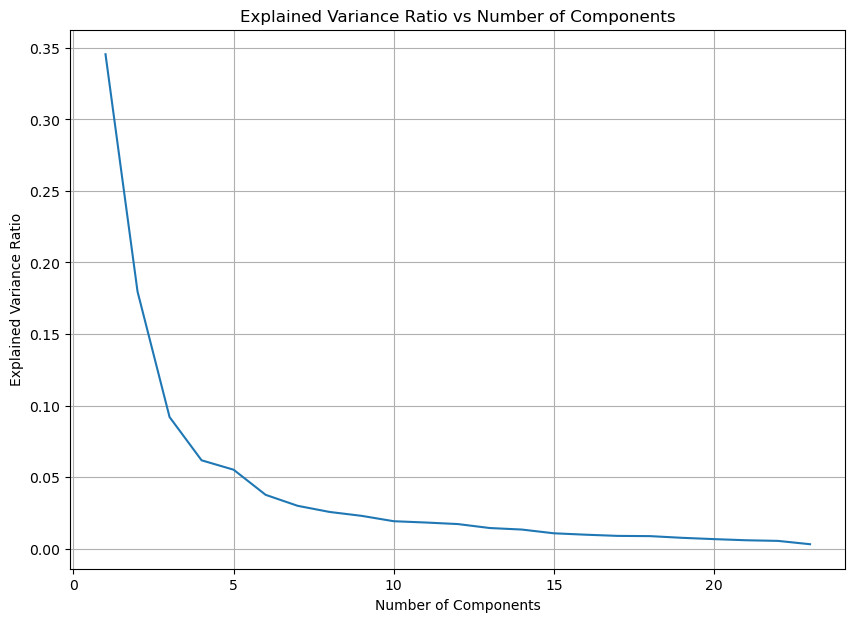

In [76]:
#TODO

explained_variance_ratio = pca.get_explained_variance_ratio()

n_components = range(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(10, 7))
plt.plot(n_components, explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()


therefore we are going to pick 5 components

In [77]:
#TODO
numof_pc_components = 5
explained_variance_ratio = pca.get_explained_variance_ratio()

# Calculate the total explained variance ratio for the first 5 components
total_explained_variance_ratio = np.sum(explained_variance_ratio[:numof_pc_components])

# Print the total explained variance ratio
print(f"Total explained variance ratio for the first {numof_pc_components} components:\n {total_explained_variance_ratio}")


Total explained variance ratio for the first 5 components:
 0.7342383065178447


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [78]:
#TODO
postpca= pca_result[:,:numof_pc_components]
columns = [f'pc{i+1}' for i in range(numof_pc_components)]
postpca_df = pd.DataFrame(postpca, columns=columns, index=numeric_data_scaled.index)
postpca_df['FoodGroup'] = data['FoodGroup']
postpca_df.head()

,pc1,pc2,pc3,pc4,pc5,FoodGroup
0,2.638414,-1.702512,1.283725,-3.759546,2.413650,Dairy and Egg Products
1,2.537931,-1.550464,1.279816,-3.634065,2.492683,Dairy and Egg Products
2,3.751335,-2.080190,2.067932,-3.668154,2.457203,Dairy and Egg Products
3,-2.000578,-1.361858,-0.395834,-2.432792,0.887796,Dairy and Egg Products
4,-1.582713,-1.321484,-0.238444,-2.597599,1.286317,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [79]:
#TODO
correlation_matrix_pca = postpca_df[columns].corr()
correlation_matrix_pca.round(2)

,pc1,pc2,pc3,pc4,pc5
pc1,1.0,0.0,-0.0,-0.0,-0.0
pc2,0.0,1.0,-0.0,0.0,-0.0
pc3,-0.0,-0.0,1.0,0.0,0.0
pc4,-0.0,0.0,0.0,1.0,-0.0
pc5,-0.0,-0.0,0.0,-0.0,1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [80]:
# TODO get eigenvectors
eigenvectors = pca.get_components()
eigenvectors_df = pd.DataFrame(eigenvectors, index=numeric_data_scaled.columns, columns=[f'pc{i+1}' for i in range(eigenvectors.shape[1])])
print(eigenvectors_df.head())

                           pc1       pc2       pc3       pc4       pc5  \
Energy_kcal_boxcoxed -0.165126  0.041850  0.508062 -0.158787  0.204336   
Protein_g_boxcoxed   -0.286086 -0.196127  0.026828  0.090944  0.046148   
Fat_g_boxcoxed       -0.161488 -0.123575  0.409505 -0.282774  0.266740   
Carb_g_boxcoxed       0.033767  0.414542  0.250952  0.025185 -0.101396   
Sugar_g_boxcoxed      0.076132  0.295640  0.208651 -0.279657 -0.264262   

                           pc6       pc7       pc8       pc9      pc10  ...  \
Energy_kcal_boxcoxed -0.001809  0.230398 -0.181384  0.096875 -0.106436  ...   
Protein_g_boxcoxed   -0.149797 -0.114004 -0.024163 -0.068694  0.030059  ...   
Fat_g_boxcoxed       -0.062276  0.268786 -0.283770  0.003560  0.077602  ...   
Carb_g_boxcoxed      -0.096191  0.014480  0.111605  0.104938 -0.178720  ...   
Sugar_g_boxcoxed      0.007833 -0.419444  0.064365  0.309825 -0.400605  ...   

                          pc14      pc15      pc16      pc17      pc18  \
Energy

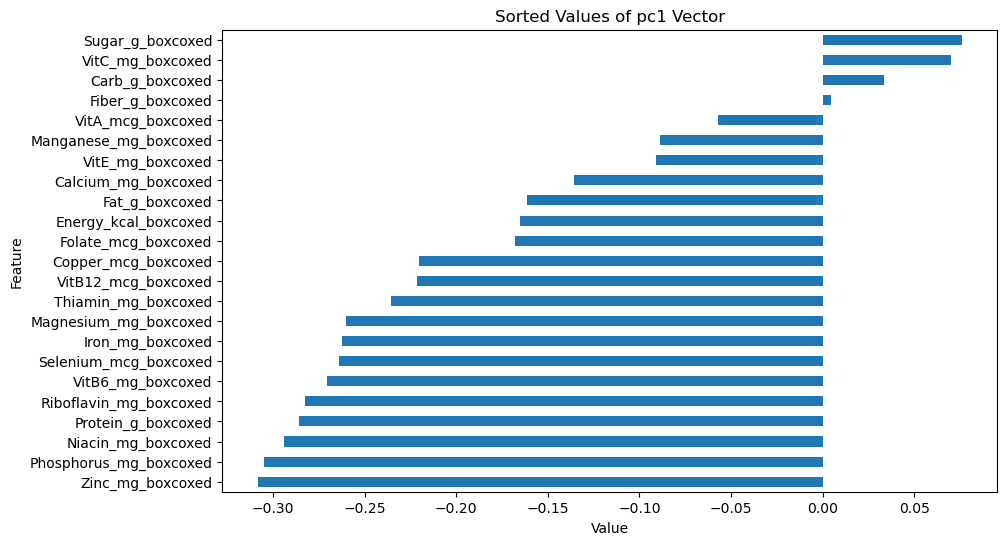

In [81]:
#TODO
def plot_component(eigenvectors_df, component):
    sorted_eigenvectors = eigenvectors_df[component].sort_values()
    plt.figure(figsize=(10, 6))
    sorted_eigenvectors.plot(kind='barh')
    plt.title(f'Sorted Values of {component} Vector')
    plt.xlabel('Value')
    plt.ylabel('Feature')
    plt.show()

plot_component(eigenvectors_df, 'pc1')


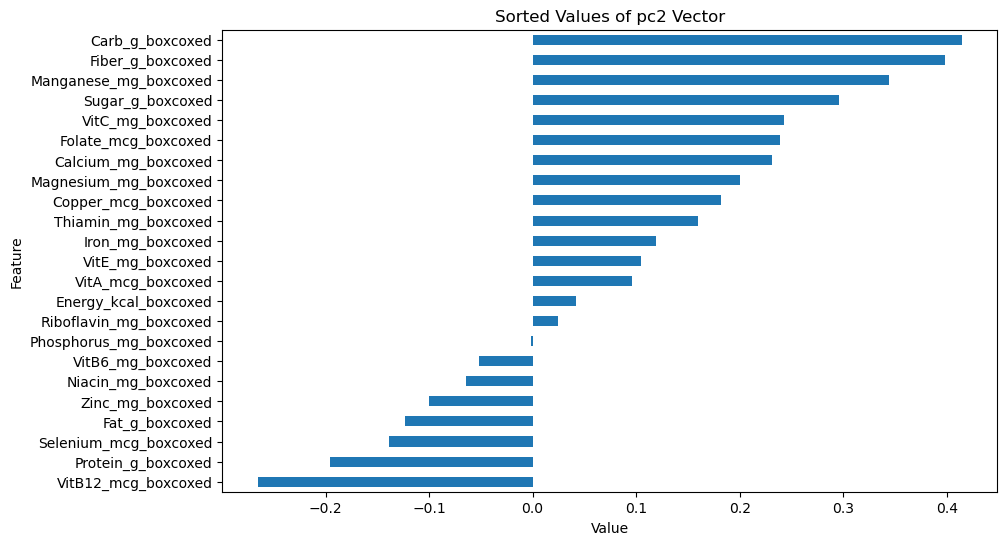

In [82]:
#TODO
plot_component(eigenvectors_df, 'pc2')

some of my vectors are just in the opposite direction of the vectors of answers. it doesn't matter at all since the explained variance is the same and pc vectors are just about direction.

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER</span>

The eigenvector values indicate the weight or loading of each nutrient in the principal component.
Positive values indicate a positive correlation with the principal component, while negative values indicate a negative correlation.
Larger magnitudes (positive or negative) signify a stronger influence of the nutrient on the principal component. meaning that the magnitude tells us the amount of information coverage or variation explained by the principal component.
and we see that PC1 has higher magnitudes which is expected because of its higher eigenvalue indicating more varaition explained.


### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

In [83]:
#TODO
pca1_foodgroup = pd.DataFrame({
    'pc1': postpca_df['pc1'],
    'FoodGroup': postpca_df['FoodGroup']
})

tops_pc1 = pca1_foodgroup.nlargest(500, 'pc1')

pca2_foodgroup = pd.DataFrame({
    'pc2': postpca_df['pc2'],
    'FoodGroup': postpca_df['FoodGroup']
})

tops_pc2 = pca2_foodgroup.nlargest(500, 'pc2')

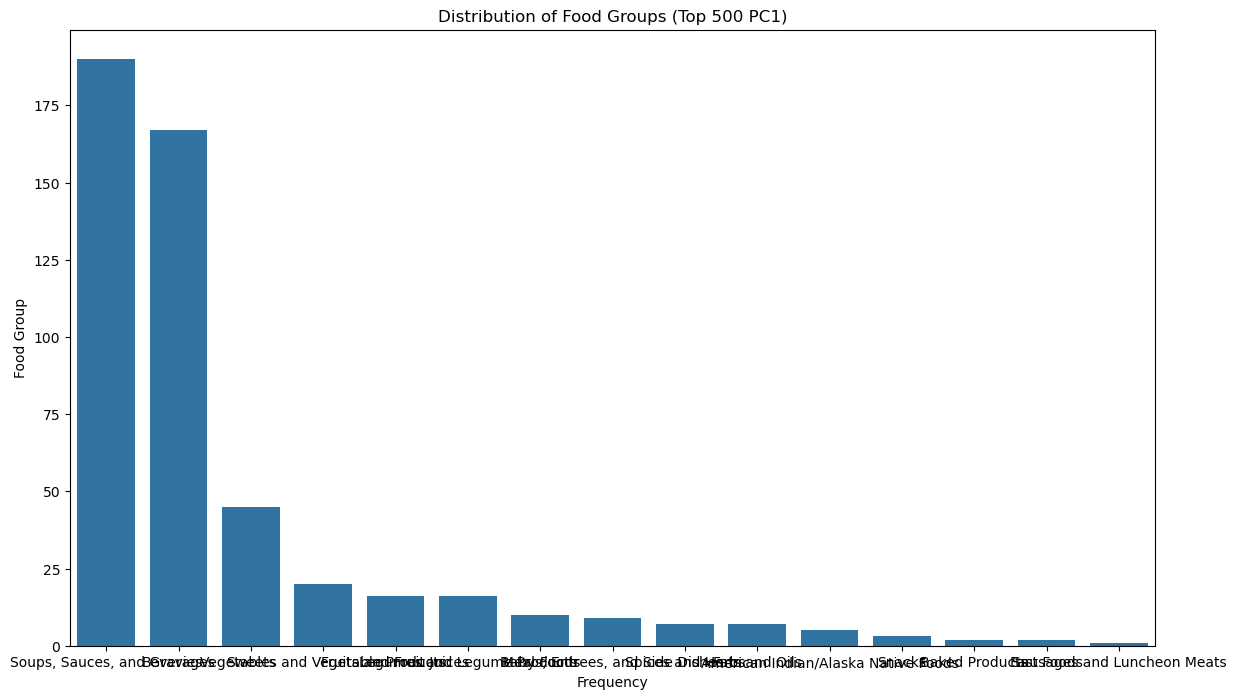

In [84]:
plt.figure(figsize=(14, 8))
sns.countplot(x='FoodGroup', data=tops_pc1, order=tops_pc1['FoodGroup'].value_counts().index)
plt.title('Distribution of Food Groups (Top 500 PC1)')
plt.xlabel('Frequency')
plt.ylabel('Food Group')
plt.show()

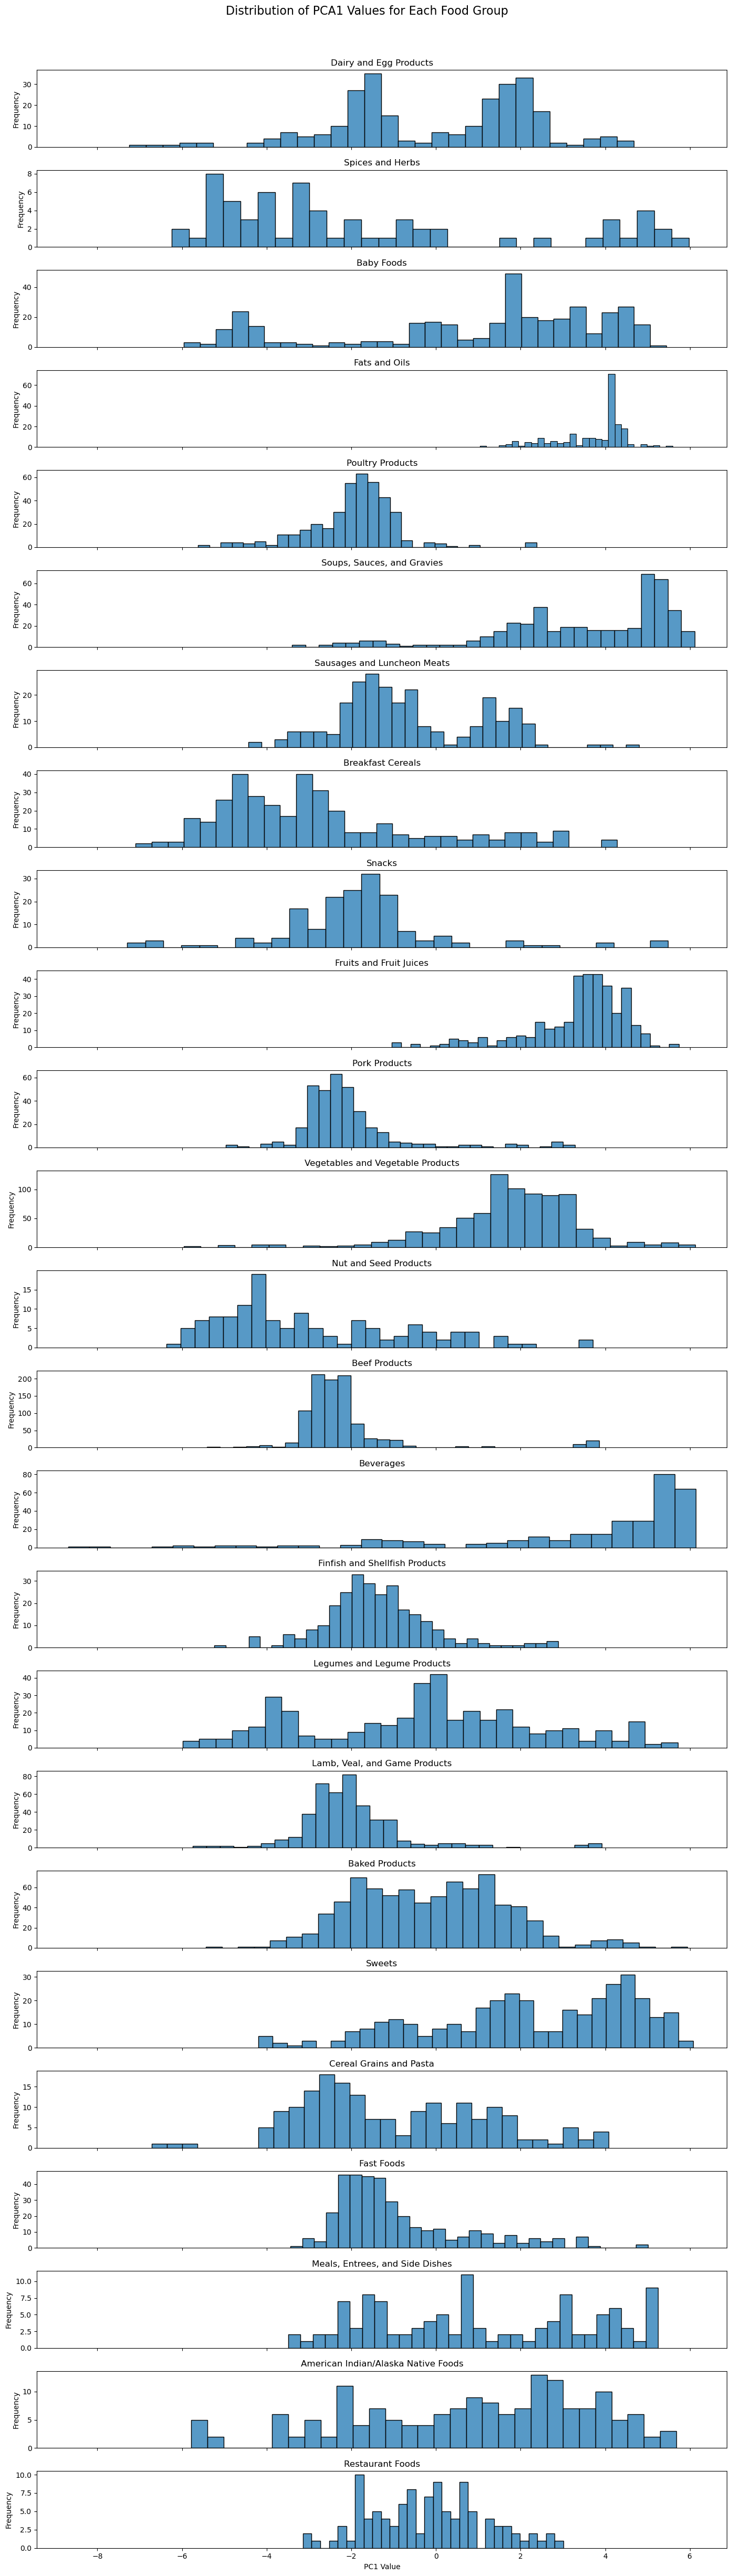

In [85]:
#TODO
food_groups = pca1_foodgroup['FoodGroup'].unique()

# Plot the distribution of PCA1 values for each food group in a single figure
num_groups = len(food_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(14, 2 * num_groups), sharex=True)
fig.suptitle('Distribution of PCA1 Values for Each Food Group', fontsize=16)

for i, group in enumerate(food_groups):
    ax = axes[i]
    sns.histplot(pca1_foodgroup[pca1_foodgroup['FoodGroup'] == group]['pc1'], bins=30, kde=False, ax=ax)
    ax.set_title(group)
    ax.set_ylabel('Frequency')

plt.xlabel('PC1 Value')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Do the same for pca2.

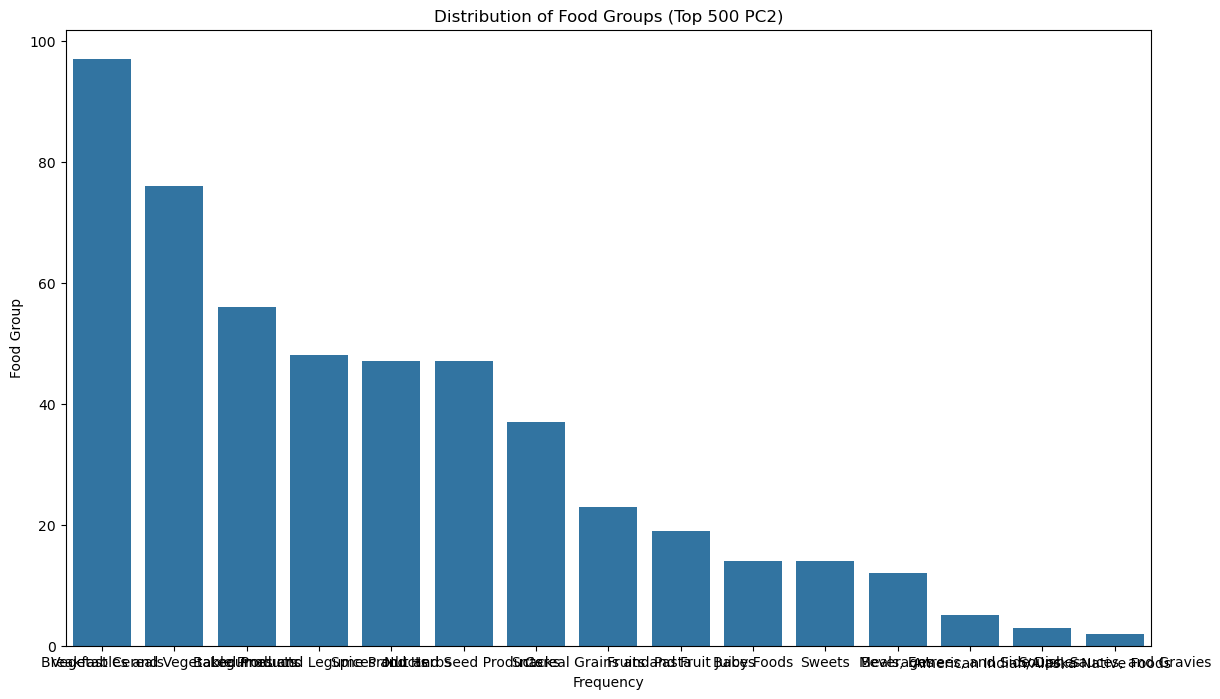

In [86]:
#TODO
plt.figure(figsize=(14, 8))
sns.countplot(x='FoodGroup', data=tops_pc2, order=tops_pc2['FoodGroup'].value_counts().index)
plt.title('Distribution of Food Groups (Top 500 PC2)')
plt.xlabel('Frequency')
plt.ylabel('Food Group')
plt.show()

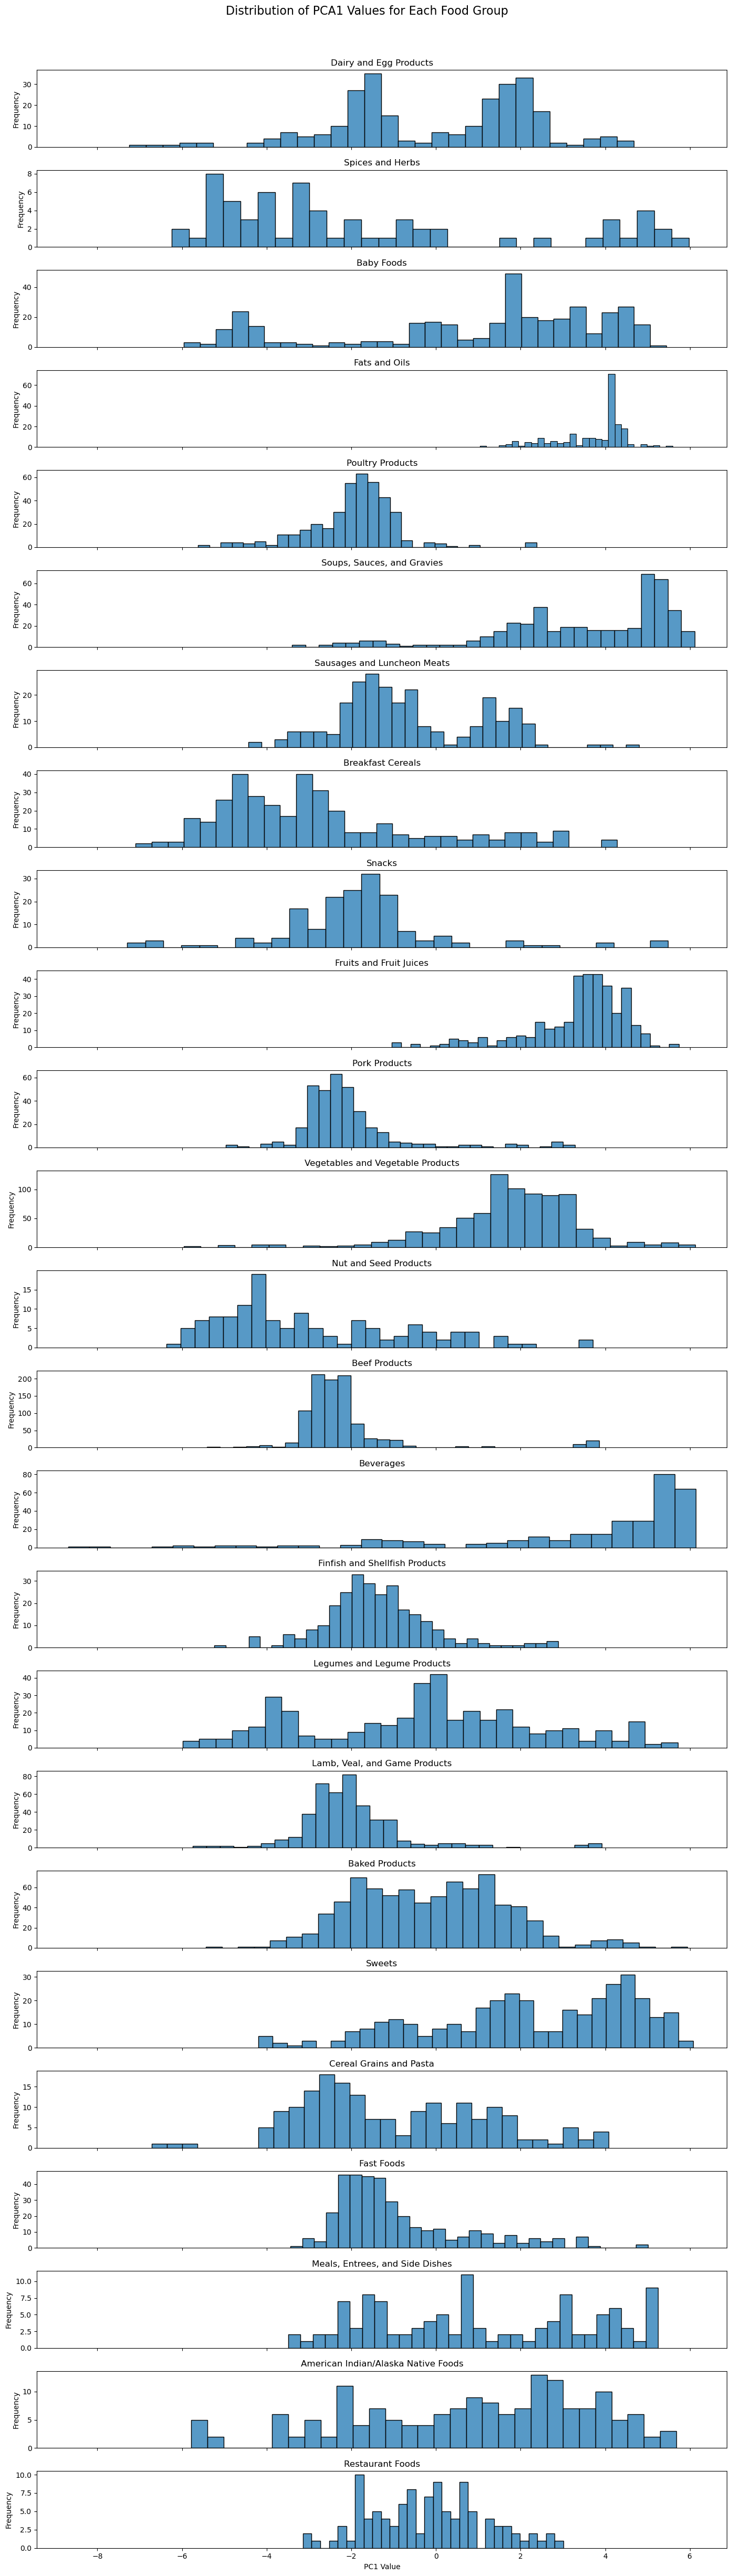

In [87]:
#TODO
food_groups = pca2_foodgroup['FoodGroup'].unique()

# Plot the distribution of PCA1 values for each food group in a single figure
num_groups = len(food_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(14, 2 * num_groups), sharex=True)
fig.suptitle('Distribution of PCA1 Values for Each Food Group', fontsize=16)

for i, group in enumerate(food_groups):
    ax = axes[i]
    sns.histplot(pca1_foodgroup[pca2_foodgroup['FoodGroup'] == group]['pc1'], bins=30, kde=False, ax=ax)
    ax.set_title(group)
    ax.set_ylabel('Frequency')

plt.xlabel('PC1 Value')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


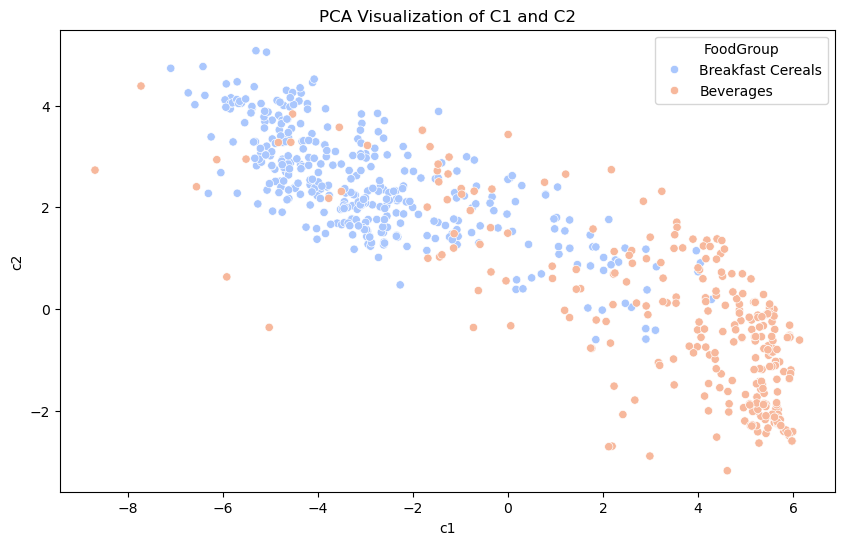

In [88]:
#TODO
pc1_pc2_scatter = pd.DataFrame({
    'PC1': postpca_df['pc1'],
    'PC2': postpca_df['pc2'],
    'FoodGroup': postpca_df['FoodGroup']
})

final_data = pc1_pc2_scatter[pc1_pc2_scatter['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

# Plot the PCA1 and PCA2 values for Beverages and Breakfast Cereals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='PC1', y='PC2', hue='FoodGroup', palette='coolwarm')
plt.title('PCA Visualization of C1 and C2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.legend(title='FoodGroup')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer</span>

The distribution of PCs across different food groups helps us understand how each food group contributes to the variation captured by that component.The distribution plots reveal how different food groups contribute to the overall variation in the dataset. 
For instance, if a food group has a wide spread or a distinct peak in the PCA1 distribution, it indicates that this group has significant variation along the first principal component.
By comparing the distributions of PCA1 and PCA2 across food groups, we can identify which groups are similar or different in terms of their nutritional profiles.
Groups with overlapping distributions might share similar nutritional characteristics, while groups with distinct distributions are nutritionally different.
The presence of outliers in the distribution plots can indicate specific food items within a group that are nutritionally unique.
The variability within each food group is also highlighted, which can be used to understand the diversity of nutritional content within a group.
### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer</span>

The scatter plot shows how individual samples are distributed in the 2D space defined by PCA1 and PCA2.
The distribution plots for PCA1 (histograms for each food group) show how each food group is spread along the PCA1 axis.
The shape and spread of the distributions in the histograms can help explain the positioning and clustering of points in the scatter plot.
If a food group has a wide spread or multiple peaks in its PCA1 distribution, it suggests that this group has high variability along PCA1.
This variability can lead to more scattered points in the PCA1 direction within the scatter plot.
Conversely, if a food group has a narrow distribution, its points will be more tightly clustered along the PCA1 axis in the scatter plot.